##Contexto

Encuentre las mejores estrategias para mejorar la próxima campaña de marketing. ¿Cómo puede la institución financiera lograr una mayor efectividad en futuras campañas de marketing? Para responder a esta pregunta, debemos analizar la última campaña de marketing que realizó el banco e identificar patrones que nos ayuden a extraer conclusiones para desarrollar estrategias futuras.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df=pd.read_csv('/bank.csv')

In [ ]:
#visualizacion de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#Verificacion Datos NA
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
#Verificacion Datos Duplcados
df.duplicated().sum()

np.int64(0)

In [ ]:
#Analisis exploratorio EDA
print("Frecuencia de categorías para los datos:")
display(df.value_counts())

Frecuencia de categorías para los datos:


age  job      marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  deposit
95   retired  divorced  primary    no       2282     no       no    telephone  21   apr    207       17        -1     0         unknown   yes        1
18   student  single    primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes        1
                                                                               13   nov    210       1          93    1         success   yes        1
                        secondary  no       5        no       no    cellular   24   aug    143       2         -1     0         unknown   no         1
                        unknown    no       3        no       no    cellular   25   aug    130       2         -1     0         unknown   yes        1
                                                                                                                                                    ..
19   student  single    secondary  no       329      no       no    cellular   30   apr    169       1          190   2         success   yes        1
                                                                               22   oct    252       2         -1     0         unknown   yes        1
                                            302      no       no    cellular   16   jul    205       1         -1     0         unknown   yes        1
                                            55       no       no    telephone  6    oct    89        2          193   1         other     no         1
                        primary    no       608      no       no    cellular   12   may    236       1          180   2         success   yes        1
Name: count, Length: 11162, dtype: int64

El análisis de frecuencias muestra que un alto volumen de adultos y estudiantes fue contactado principalmente a través del canal celular. Asimismo, en el caso de los estudiantes, las llamadas tienden a tener mayor duración. Estos patrones sugieren segmentos relevantes para el análisis, aunque la efectividad final de la campaña debe evaluarse considerando la variable objetivo (deposit) mediante modelos predictivos.

In [ ]:
x=df.columns
print(x)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')



Histogramas de variables numéricas:


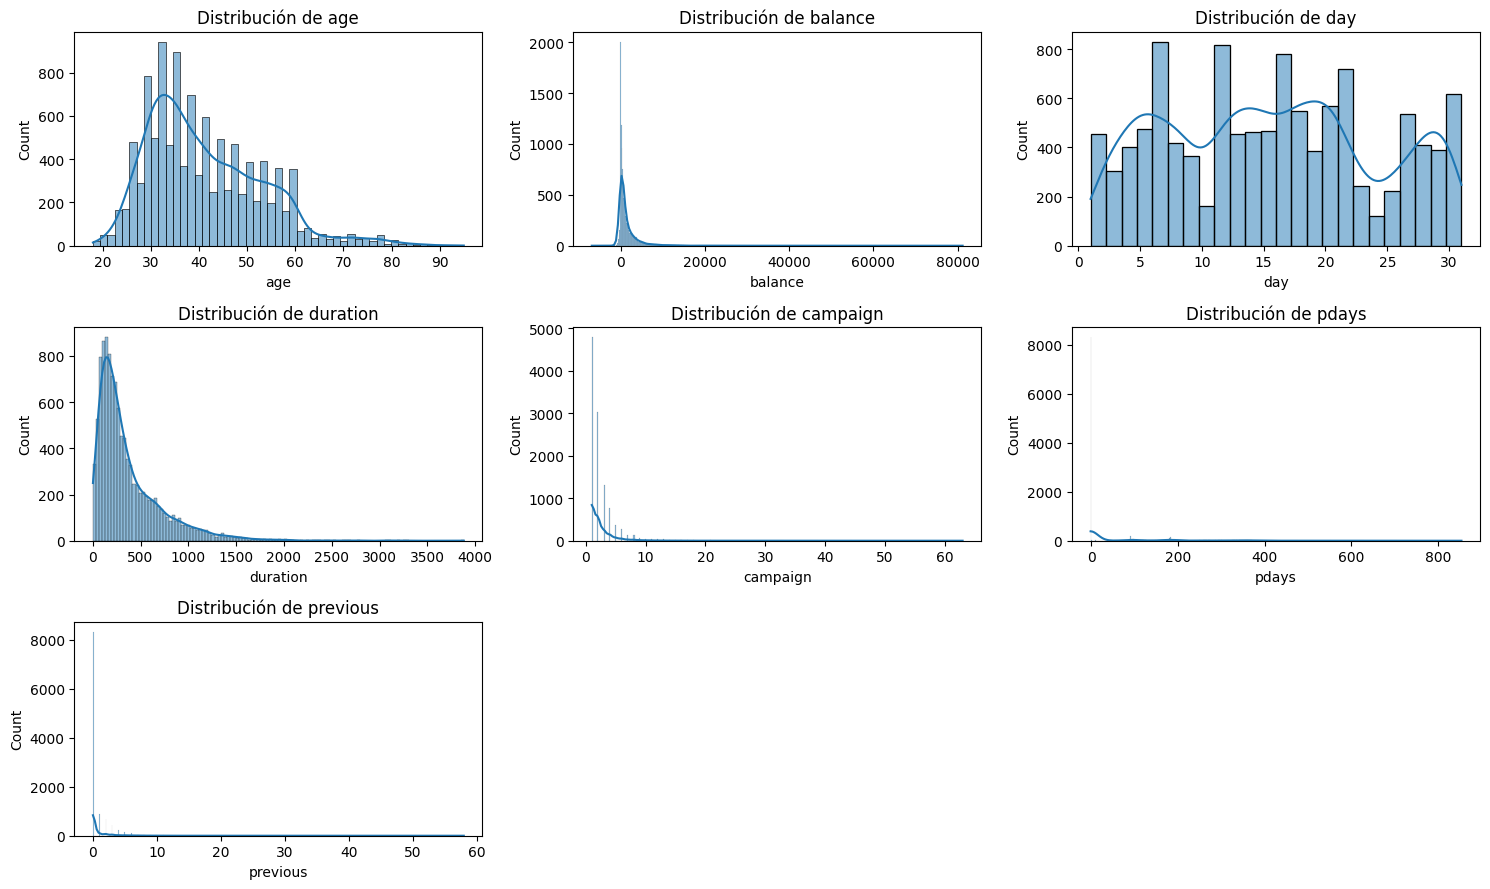


Estadísticas descriptivas adicionales para variables numéricas:


,age,balance,day,duration,campaign,pdays,previous
skew,0.86278,8.224619,0.111330,2.143695,5.545578,2.449986,7.335298
kurtosis,0.62154,126.861303,-1.061324,7.301282,57.389771,6.838359,106.197826


In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

print("\nHistogramas de variables numéricas:")
plt.figure(figsize=(15, 9))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

print("\nEstadísticas descriptivas adicionales para variables numéricas:")
display(df[numerical_cols].agg(['skew', 'kurtosis']))

La kurtosis de la campaña indica que hay una cola muy pesada. en ella reposa la mayor cantidad de outliers, Esto sugiere que ciertos clientes requieren múltiples contactos, lo cual puede influir en la probabilidad de aceptación del depósito.

por otro lado el Skew para la variable pdays indica asimetria hacia la derecha de los datos lo cual indica que hay valores bajos luego de pasado cierto numero dias, y valores altos en los primeros dias posteriores a las llamadas Lo anterior indica que el momento del contacto puede afectar la respuesta del cliente.

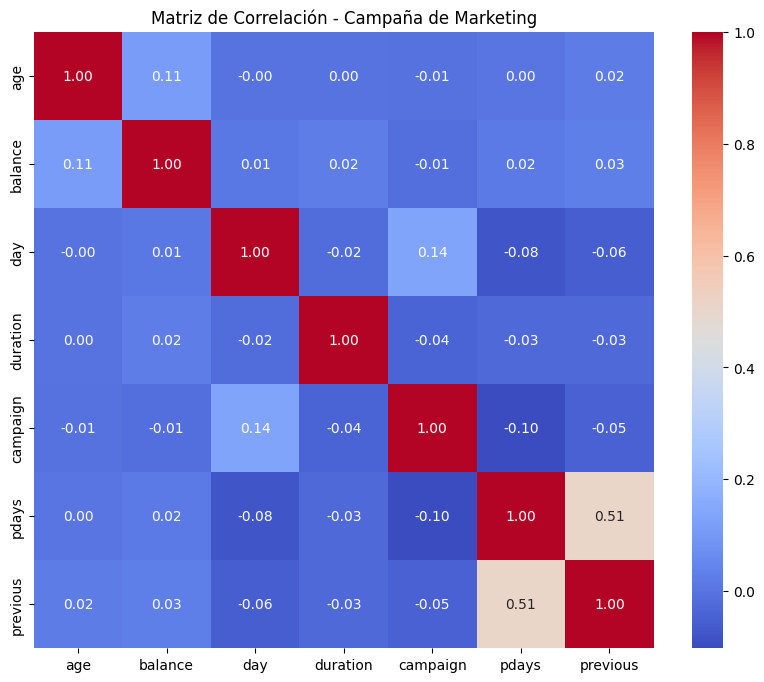

In [ ]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Campaña de Marketing')
plt.show()

Existe una correlacion entre las campañas y los dias posteriores a la misma Esto refuerza la hipótesis de que la estrategia de contacto impacta el resultado final de la campaña.

In [ ]:
#Transformacion de variables
x= df[['campaign', 'pdays']]

# Variable objetivo (1 = éxito, 0 = no éxito)
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})
df['deposit'] = df['deposit'].fillna(0)
y = df['deposit']


*Implementacion modelo Random Forest*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=100,
    stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

bosque.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Hacer Predicciones
y_pred = bosque.predict(X_test)


In [ ]:
#Exactitud del modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6278549037169727


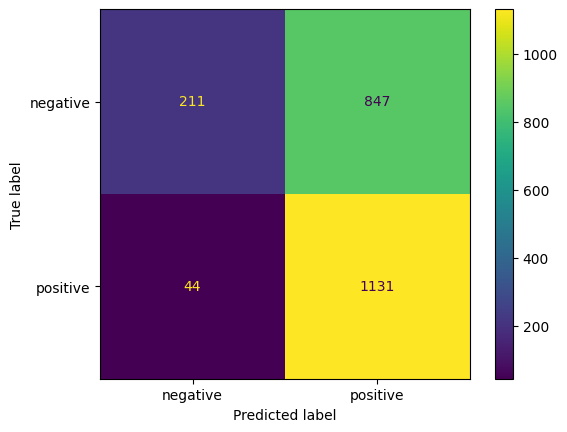

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Matriz de confusion
cm = confusion_matrix(y_test,y_pred, labels=[1,0])
cmd = ConfusionMatrixDisplay(cm, display_labels=['negative', 'positive'])
cmd.plot()
plt.show()

#¿Cuántos clientes valiosos detecté? → TP
#¿Cuántos perdí? → FN
#¿Cuántas llamadas innecesarias hice? → FP

# [[TN  FP]
#  [FN  TP]]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.92      0.72      1175
           1       0.78      0.30      0.43      1058

    accuracy                           0.63      2233
   macro avg       0.69      0.61      0.58      2233
weighted avg       0.68      0.63      0.59      2233



In [ ]:
#Obtener la probabilidad del modelo
y_proba = bosque.predict_proba(X_test)[:, 1]
y_proba

array([0.33642675, 0.36926183, 0.45898044, ..., 0.788     , 1.        ,
       0.0575    ])

*Ajuste de modelo ML por Random Forest*

In [ ]:
#Definimos un Umbral
umbral = 0.15 #Priorizando mas la captacion de clientes
y_pred = (y_proba >= umbral).astype(int)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[  39 1136]
 [  23 1035]]
              precision    recall  f1-score   support

           0       0.63      0.03      0.06      1175
           1       0.48      0.98      0.64      1058

    accuracy                           0.48      2233
   macro avg       0.55      0.51      0.35      2233
weighted avg       0.56      0.48      0.34      2233



El ajuste del umbral a 0.15 permite maximizar la captación de clientes potenciales, reduciendo significativamente los casos perdidos, a costa de un mayor número de llamadas no efectivas.

In [ ]:
#Definimos un Umbral
umbral = 0.8 #Priorizando mas el numero de llamadas efectivas
y_pred = (y_proba >= umbral).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1131   44]
 [ 847  211]]
              precision    recall  f1-score   support

           0       0.57      0.96      0.72      1175
           1       0.83      0.20      0.32      1058

    accuracy                           0.60      2233
   macro avg       0.70      0.58      0.52      2233
weighted avg       0.69      0.60      0.53      2233



Al aumentar el umbral a 0.8, el modelo prioriza la eficiencia de la campaña, reduciendo significativamente el número de llamadas y logrando una alta tasa de aceptación, a costa de perder una gran proporción de clientes potenciales.

#**Conclusion**

El análisis de la campaña comercial anterior muestra que no todos los clientes responden de la misma manera a los esfuerzos de contacto. Existen segmentos con mayor probabilidad de aceptación y otros que generan altos costos sin un retorno proporcional. Por lo tanto, continuar con campañas masivas e indiferenciadas limita la eficiencia y el impacto de las acciones comerciales.

**Estrategias recomendadas**

***Estrategia 1: Campaña enfocada en eficiencia***

**Recomendación:**

Aplicar campañas dirigidas a un grupo reducido de clientes con alta probabilidad de aceptación.

**Cuándo implementarla:**

Cuando el presupuesto de la campaña es limitado

Cuando se busca reducir la carga operativa del equipo comercial

Para productos con márgenes ajustados

**Resultado esperado:**

Menor número de contactos

Mayor tasa de aceptación por cliente contactado

Mejor control de costos operativos

**Estrategia 2: Campaña enfocada en crecimiento**

**Recomendación:**
Implementar campañas de mayor alcance dirigidas a un grupo amplio de clientes.

**Cuándo implementarla:**

Cuando el objetivo es aumentar rápidamente la base de clientes

En lanzamientos de nuevos productos

En períodos donde el costo de contacto es bajo

**Resultado esperado:**

Mayor volumen de clientes contactados

Incremento en el número total de conversiones

Mayor esfuerzo operativo

**Estrategia 3: Estrategia mixta (recomendada)**

**Recomendación principal:**
Adoptar una estrategia combinada, donde se utilicen ambos enfoques de manera complementaria.

**Cómo aplicarla:**

Iniciar la campaña con un enfoque eficiente, priorizando clientes con mayor probabilidad de aceptación

Ampliar gradualmente el alcance hacia otros segmentos según la capacidad operativa y los resultados obtenidos

Ajustar la intensidad de la campaña de acuerdo con la respuesta del mercado

**Resultado esperado:**

Balance entre crecimiento y eficiencia

Uso más inteligente de los recursos

Mayor flexibilidad para adaptarse a diferentes escenarios de negocio

**Recomendación final**

Se recomienda que la compañía abandone el enfoque de campañas uniformes y adopte un modelo de campañas segmentadas, utilizando la información histórica para decidir cuándo priorizar eficiencia y cuándo priorizar crecimiento. La estrategia mixta ofrece el mejor balance entre impacto comercial y control operativo, permitiendo maximizar resultados sin comprometer recursos.